## IMPORTS

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

---

## SUPERVISED ML: CLASSIFICATION

### GET DATA

In [2]:
iris = load_iris()
data = iris.data
target = iris.target

In [3]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

### INSPECT DATA

In [4]:
data.shape

(150, 4)

#### Pandas DataFrame

In [5]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df = pd.DataFrame(data, columns=columns)
df['species'] = target
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Pandas Random Sampling

In [6]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
40,5.0,3.5,1.3,0.3,0
85,6.0,3.4,4.5,1.6,1
127,6.1,3.0,4.9,1.8,2
125,7.2,3.2,6.0,1.8,2
79,5.7,2.6,3.5,1.0,1
17,5.1,3.5,1.4,0.3,0
30,4.8,3.1,1.6,0.2,0
25,5.0,3.0,1.6,0.2,0
58,6.6,2.9,4.6,1.3,1


#### Pandas Dataset Stats

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#### Pandas Boxplot

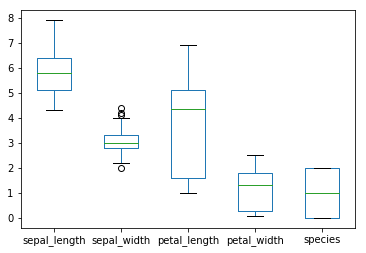

In [8]:
df.plot(kind='box');

#### Seaborn Boxplot

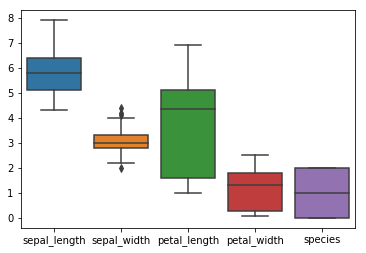

In [9]:
sns.boxplot(data=df);

#### Seaborn Pairplot

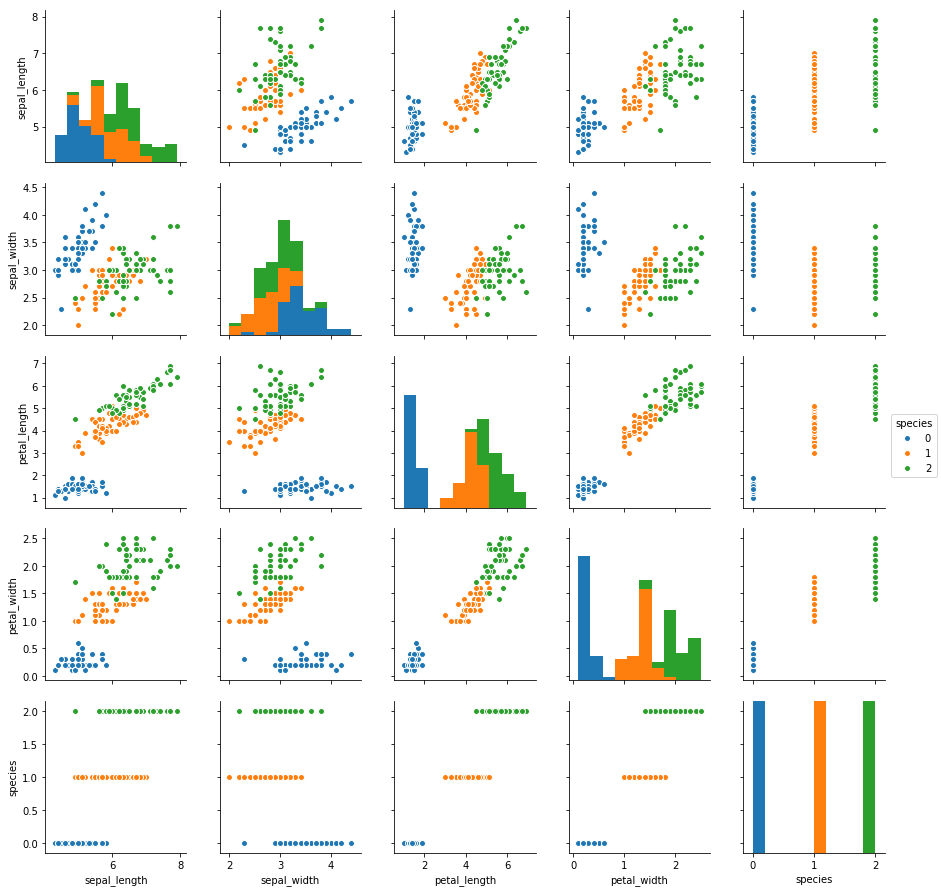

In [10]:
sns.pairplot(df, hue='species');

#### Seaborn Swarm Plot

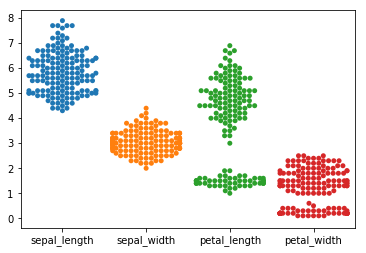

In [11]:
sns.swarmplot(data=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]);

---

## ML IMPORTS

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import recall_score, precision_score, confusion_matrix , f1_score

#### Train/Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, target, 
                                                    test_size=0.5, 
                                                    random_state=14)

#### Logistic Regression

In [14]:
# instantiate model
lr = LogisticRegression(penalty='l2', 
                        random_state=42, 
                        multi_class='ovr',
                        solver='newton-cg',
                        n_jobs=-1)

In [15]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=42, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
lr_predictions = lr.predict(X_test)
lr_predictions

array([0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 2, 2, 1, 0, 0, 0,
       1, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 1, 2, 2, 0, 0, 1, 2, 2,
       0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 0, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1,
       1, 1, 1, 2, 2, 2])

In [17]:
conf_matrix = confusion_matrix(y_test, lr_predictions)
conf_matrix

array([[25,  0,  0],
       [ 0, 24,  5],
       [ 0,  2, 19]])

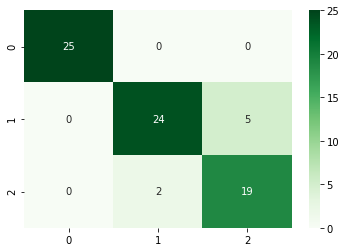

In [18]:
# heatmap of confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap="Greens");

In [19]:
accuracy_score(y_test, lr_predictions)

0.90666666666666662

In [20]:
log_loss(y_test, lr.predict_proba(X_test))

0.33009189306126369

In [21]:
precision_score(y_test, lr_predictions, average='weighted')

0.91192307692307695

In [22]:
recall_score(y_test, lr_predictions, average='macro')

0.91078270388615212

In [23]:
f1_score(y_test, lr_predictions, average='macro')

0.90572390572390571

In [24]:
def pretty_report(model, y_test, predictions, n_classes):
    '''returns report of key metrics'''
    n_classes -= 1
    print(confusion_matrix(y_test, predictions))
    print()
    print('accuracy: {:7.4}'.format(accuracy_score(y_test, predictions)))
    print('log loss: {:7.4}'.format(log_loss(y_test, model.predict_proba(X_test))))
    print('precision: {:4.4}'.format(precision_score(y_test, predictions, average='weighted')))
    print('recall: {:9.4}'.format(recall_score(y_test, predictions, average='macro')))
    print('f1 score: {:7.4}'.format(f1_score(y_test, predictions, average='macro')))

In [25]:
pretty_report(lr, y_test, lr_predictions, 3)

[[25  0  0]
 [ 0 24  5]
 [ 0  2 19]]

accuracy:  0.9067
log loss:  0.3301
precision: 0.9119
recall:    0.9108
f1 score:  0.9057


#### Naive Bayes, Support Vector Machines, Decision Tree, Random Forest, Gradient Boosting

The format for training models is always the following:
1. instantiate model
2. fit model
3. predict

In [26]:
# instantiate models
nb = GaussianNB()
svc = SVC(kernel='rbf', probability=True, random_state=42)
dt = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=54)
rf = RandomForestClassifier(n_estimators=20, criterion='entropy', n_jobs=-1, random_state=999)
gb = GradientBoostingClassifier(n_estimators=25, max_depth=3, random_state=123)

In [27]:
# let's build an auto-model train and tester
algo_dict = {'Naive Bayes':nb, 'Support Vector Classifier':svc, 'Decision Tree':dt, 
             'Random Forest':rf, 'Gradient Boosting':gb}

In [28]:
for k,v in algo_dict.items():
    model = v.fit(X_train, y_train)
    preds = model.predict(X_test)
    print('<{}>\n'.format(k))
    pretty_report(model, y_test, preds, 3)
    print('{}{}{}'.format('\n','-'*30,'\n'))

<Support Vector Classifier>

[[25  0  0]
 [ 0 26  3]
 [ 0  1 20]]

accuracy:  0.9467
log loss:  0.1499
precision: 0.9492
recall:    0.9496
f1 score:  0.9459

------------------------------

<Naive Bayes>

[[25  0  0]
 [ 0 28  1]
 [ 0  3 18]]

accuracy:  0.9467
log loss:  0.1759
precision: 0.9478
recall:    0.9409
f1 score:  0.9444

------------------------------

<Gradient Boosting>

[[25  0  0]
 [ 0 27  2]
 [ 0  2 19]]

accuracy:  0.9467
log loss:  0.2535
precision: 0.9467
recall:    0.9453
f1 score:  0.9453

------------------------------

<Random Forest>

[[25  0  0]
 [ 0 27  2]
 [ 0  2 19]]

accuracy:  0.9467
log loss:  0.5641
precision: 0.9467
recall:    0.9453
f1 score:  0.9453

------------------------------

<Decision Tree>

[[25  0  0]
 [ 0 27  2]
 [ 0  2 19]]

accuracy:  0.9467
log loss:   1.842
precision: 0.9467
recall:    0.9453
f1 score:  0.9453

------------------------------



#### Grid Search

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
gb2 = GradientBoostingClassifier(random_state=423)
param_grid = {'n_estimators':(5,15,25,35),
              'learning_rate':(0.01, 0.1),
              'max_depth':(1,2,3)}

In [31]:
grid = GridSearchCV(estimator=gb2, 
                    param_grid=param_grid, 
                    scoring='neg_log_loss',
                    cv=3,
                    n_jobs=-1)

In [32]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=423, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': (0.01, 0.1), 'max_depth': (1, 2, 3), 'n_estimators': (5, 15, 25, 35)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_log_loss', verbose=0)

In [33]:
pretty_report(grid, y_test, grid.predict(X_test), 3)

[[25  0  0]
 [ 0 27  2]
 [ 0  2 19]]

accuracy:  0.9467
log loss:  0.2187
precision: 0.9467
recall:    0.9453
f1 score:  0.9453


#### Randomized Search

In [34]:
from sklearn.model_selection import RandomizedSearchCV

In [35]:
gb3 = GradientBoostingClassifier(random_state=423)

In [36]:
random = RandomizedSearchCV(estimator=gb3, 
                            param_distributions=param_grid,
                            scoring='neg_log_loss',
                            cv=3,
                            n_jobs=-1)

In [37]:
random.fit(X_test, y_test)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=423, subsample=1.0, verbose=0,
              warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': (0.01, 0.1), 'max_depth': (1, 2, 3), 'n_estimators': (5, 15, 25, 35)},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_log_loss', verbose=0)

In [38]:
pretty_report(random, y_test, random.predict(X_test), 3)

[[25  0  0]
 [ 0 28  1]
 [ 0  1 20]]

accuracy:  0.9733
log loss:  0.0939
precision: 0.9733
recall:    0.9726
f1 score:  0.9726


## WHERE TO GO FROM HERE?

We just scratched the surface. Make sure to look through the [sklearn docs](http://scikit-learn.org/stable/index.html) for other algorithms, techniques, and example code. 

And be sure to check out [Regression](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning), [Pipeline](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), [TruncatedSVD](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html), and [Clustering](http://scikit-learn.org/stable/modules/clustering.html). 